In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm,datasets
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import precision_score,recall_score,ConfusionMatrixDisplay,classification_report,f1_score,accuracy_score
from sklearn.metrics import confusion_matrix

In [61]:
data=pd.read_csv("mushrooms.csv")

In [62]:
data.shape

(8124, 23)

In [63]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [64]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [65]:
data['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [66]:
inputs=data.drop(['class'],axis=1)
targets=data['class']

In [67]:
x_train,x_test,y_train,y_test=train_test_split(inputs,targets,
                                               test_size=0.2,
                                               random_state=365,stratify=targets)

In [68]:
y_test.value_counts()

class
e    842
p    783
Name: count, dtype: int64

In [69]:
y_train.value_counts()

class
e    3366
p    3133
Name: count, dtype: int64

In [70]:
ord_enc=OrdinalEncoder()
lab_enc=LabelEncoder()

In [71]:
x_train_trans=ord_enc.fit_transform(x_train)
x_test_trans=ord_enc.transform(x_test)

y_train_trans=lab_enc.fit_transform(y_train)
y_test_trans=lab_enc.transform(y_test)


In [72]:
scaler=MinMaxScaler(feature_range=(-1,1))
x_train_scaled=scaler.fit_transform(x_train_trans)

In [73]:
x_train_scaled

array([[ 0.2       ,  1.        , -0.55555556, ...,  0.75      ,
        -0.6       ,  1.        ],
       [ 1.        ,  1.        , -0.11111111, ..., -0.5       ,
         1.        ,  0.33333333],
       [-0.2       , -1.        , -0.11111111, ..., -0.5       ,
         0.6       , -1.        ],
       ...,
       [-0.2       ,  1.        , -0.55555556, ...,  0.75      ,
         0.6       , -1.        ],
       [ 0.2       , -1.        ,  0.77777778, ...,  0.75      ,
         0.2       , -0.66666667],
       [ 1.        , -1.        , -0.33333333, ..., -0.25      ,
         0.6       , -1.        ]])

In [74]:
c=1

svc=svm.SVC(kernel='linear',C=c)
svc.fit(x_train_scaled,y_train_trans)

SVC(C=1, kernel='linear')

In [75]:
predicted_outputs=svc.predict(scaler.transform(x_test_trans))

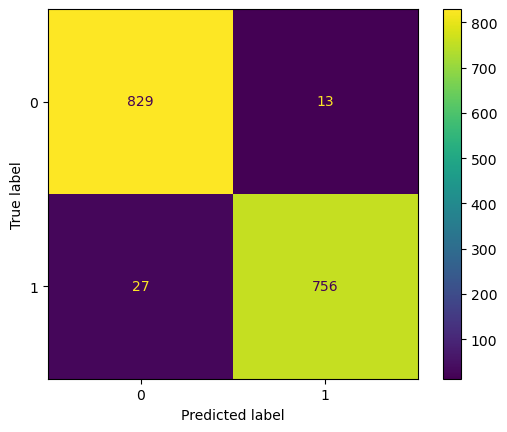

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test_trans,predicted_outputs)
plt.show()

In [77]:
print(classification_report(y_test_trans,predicted_outputs))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       842
           1       0.98      0.97      0.97       783

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [84]:
cross_val=[
    {'kernel':['linear'],'C':[1,10]},
    {'kernel':['poly'],'C':[1,10]},
    {'kernel':['rbf'],'gamma':[1e-4,1e-5],'C':[1,10]},
]

In [85]:
scores=['precision','recall']

In [89]:
for score in scores:
    model=GridSearchCV(svm.SVC(),cross_val,scoring=score)
    model.fit(x_train_scaled,y_train_trans)
    print("Best Parameters")
    print(model.best_params_)
    pr=model.predict(x_test_trans)
    print(model.cv_results_['params'])
    print(classification_report(y_test_trans,pr))

C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision 

Best Parameters
{'C': 1, 'kernel': 'poly'}
[{'C': 1, 'kernel': 'linear'}, {'C': 10, 'kernel': 'linear'}, {'C': 1, 'kernel': 'poly'}, {'C': 10, 'kernel': 'poly'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}]
              precision    recall  f1-score   support

           0       0.54      0.74      0.62       842
           1       0.53      0.32      0.39       783

    accuracy                           0.53      1625
   macro avg       0.53      0.53      0.51      1625
weighted avg       0.53      0.53      0.51      1625

Best Parameters
{'C': 1, 'kernel': 'poly'}
[{'C': 1, 'kernel': 'linear'}, {'C': 10, 'kernel': 'linear'}, {'C': 1, 'kernel': 'poly'}, {'C': 10, 'kernel': 'poly'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'

In [90]:
best_svm=svm.SVC(kernel='poly',C=1)
best_svm.fit(x_train_scaled,y_train_trans)

SVC(C=1, kernel='poly')

In [91]:
pr=best_svm.predict(scaler.transform(x_test_trans))
print(classification_report(y_test_trans,pr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



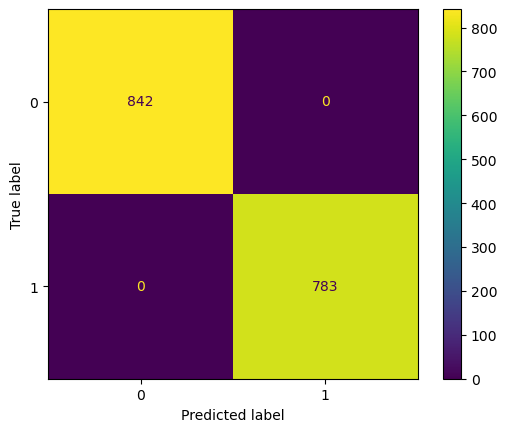

In [93]:
ConfusionMatrixDisplay.from_predictions(y_test_trans,pr)

## Created a Poisonous/Edible Mushroom Classifier with 100% Accuracy.